In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

df = pd.read_excel('C:/Anaconda3/projects/oled/oled.xlsx', sheetname='pholed_model')
df = df[list(df.columns)[1:-1] + ['cd/A']]
df.dropna(axis=0, inplace=True)

X = df[list(df.columns)[:-1]]
y = df[['cd/A']]

X.head()

,homo_HIL,thickness_HIL,lumo_HTL1,homo_HTL1,thickness_HTL1,lumo_HTL2,homo_HTL2,thickness_HTL2,lumo_HTL3,homo_HTL3,...,triplet_ETL,total_ETL_thickness,lumo_ETL1,homo_ETL1,thickness_ETL1,lumo_ETL2,homo_ETL2,thickness_ETL2,cathode_workfunction,thickness_EIL
0,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35,2.8,6.2,0,2.8,6.2,35.0,2.8,10.0
1,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35,2.8,6.2,0,2.8,6.2,35.0,2.8,10.0
2,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35,2.8,6.2,0,2.8,6.2,35.0,2.8,10.0
3,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35,2.8,6.2,0,2.8,6.2,35.0,2.8,10.0
4,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35,2.8,6.2,0,2.8,6.2,35.0,2.8,10.0


In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=12)

# filename = 'adaboost_model.sav'
filename = 'pholed_rf_model.sav'

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
print('R-squared: ', loaded_model.score(X_test, y_test))

R-squared:  0.87869391923


In [15]:
# new_df = pd.read_excel('C:/Anaconda3/projects/oled/generated_devices.xlsx', sheetname='Sheet1')
new_df = pd.read_pickle('C:/Anaconda3/projects/oled/new_devices.pkl')

new_X = new_df[:]
# print(new_df.shape)

y_pred = loaded_model.predict(new_X)
y_pred = [round(float(i), 2) for i in y_pred]

new_X['cd/a'] = y_pred
# device = new_X.loc[(new_X['cd/a'] >= 35) & (new_X['cd/a'] < 40)]
device = new_X.loc[new_X['cd/a'] > 40]
device.shape

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(20400, 32)

In [16]:
device.columns = ['homo_HIL','thick_HIL','lumo_HTL1','homo_HTL1','thickness_HTL1','lumo_HTL2','homo_HTL2','thickness_HTL2',
                  'lumo_HTL3','homo_HTL3','thickness_HTL3','total_HTL_thickness','triplet_HTL','LUMO_EML','HOMO_EML',
                  'triplet_HOST','thickness_EML','lumo_dopant','homo_dopant','triplet_dopant','dopant_percentage','triplet_ETL',
                  'total ETL','lumo_ETL1','homo_ETL1','thickness_ETL1','lumo_ETL2','homo_ETL2','thickness_ETL2','wf_1',
                  'thickness_EIL','cd/a']
device.head()

,homo_HIL,thick_HIL,lumo_HTL1,homo_HTL1,thickness_HTL1,lumo_HTL2,homo_HTL2,thickness_HTL2,lumo_HTL3,homo_HTL3,...,total ETL,lumo_ETL1,homo_ETL1,thickness_ETL1,lumo_ETL2,homo_ETL2,thickness_ETL2,wf_1,thickness_EIL,cd/a
11,9.5,10,2.4,6.1,40,2.4,6.1,0,2.4,6.1,...,40,2.91,6.56,0,2.91,6.56,40,4.28,0,46.26
14,9.5,10,2.4,6.1,40,2.4,6.1,0,2.4,6.1,...,50,2.91,6.56,0,2.91,6.56,50,4.28,0,47.98
17,9.5,10,2.4,6.1,40,2.4,6.1,0,2.4,6.1,...,60,2.91,6.56,0,2.91,6.56,60,4.28,0,47.77
29,9.5,10,2.4,6.1,40,2.4,6.1,0,2.4,6.1,...,40,2.91,6.56,0,2.91,6.56,40,4.28,0,46.26
32,9.5,10,2.4,6.1,40,2.4,6.1,0,2.4,6.1,...,50,2.91,6.56,0,2.91,6.56,50,4.28,0,47.98


In [18]:
# from openpyxl import load_workbook

# with pd.ExcelWriter('C:\Anaconda3\projects\oled\device_40.xlsx', engine='openpyxl') as writer:
#     writer.book = load_workbook('C:\Anaconda3\projects\oled\device_50.xlsx')
#     device.to_excel(writer,  sheet_name='35-40', index=True)
# writer.save()

In [17]:
device.to_pickle('C:/Anaconda3/projects/oled/firpic_devices.pkl')

In [23]:
df = pd.read_pickle('C:/Anaconda3/projects/oled/firpic_devices.pkl')

data = df.drop(['thick_HIL', 'thickness_HTL1', 'thickness_HTL2', 'thickness_HTL3', 'total_HTL_thickness', 'thickness_EML', 
               'total ETL', 'thickness_ETL2', 'thickness_ETL1','thickness_EIL', 'cd/a', 'lumo_dopant', 'homo_dopant', 
               'triplet_dopant', 'lumo_ETL1', 'homo_ETL1', 'lumo_HTL2', 'homo_HTL2', 'lumo_HTL3', 'homo_HTL3'], axis=1)
data.describe()

,homo_HIL,lumo_HTL1,homo_HTL1,triplet_HTL,LUMO_EML,HOMO_EML,triplet_HOST,dopant_percentage,triplet_ETL,lumo_ETL2,homo_ETL2,wf_1
count,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,2.040000e+04,2.040000e+04,2.040000e+04,2.040000e+04
mean,7.160000,2.257500,5.625000,2.762500,2.418824,5.907647,2.908824,5.500000,2.700000e+00,2.910000e+00,6.560000e+00,4.280000e+00
std,2.017573,0.199112,0.319186,0.220275,0.250743,0.417264,0.107700,2.872352,8.735449e-13,1.490400e-12,1.617413e-12,8.917530e-13
min,5.200000,1.900000,5.100000,2.300000,2.020000,5.560000,2.640000,1.000000,2.700000e+00,2.910000e+00,6.560000e+00,4.280000e+00
25%,5.300000,2.150000,5.425000,2.647500,2.280000,5.710000,2.860000,3.000000,2.700000e+00,2.910000e+00,6.560000e+00,4.280000e+00
50%,6.100000,2.330000,5.700000,2.835000,2.400000,5.850000,2.910000,5.500000,2.700000e+00,2.910000e+00,6.560000e+00,4.280000e+00
75%,9.500000,2.400000,5.825000,2.940000,2.460000,5.900000,2.940000,8.000000,2.700000e+00,2.910000e+00,6.560000e+00,4.280000e+00
max,9.700000,2.500000,6.100000,3.000000,3.000000,7.500000,3.100000,10.000000,2.700000e+00,2.910000e+00,6.560000e+00,4.280000e+00


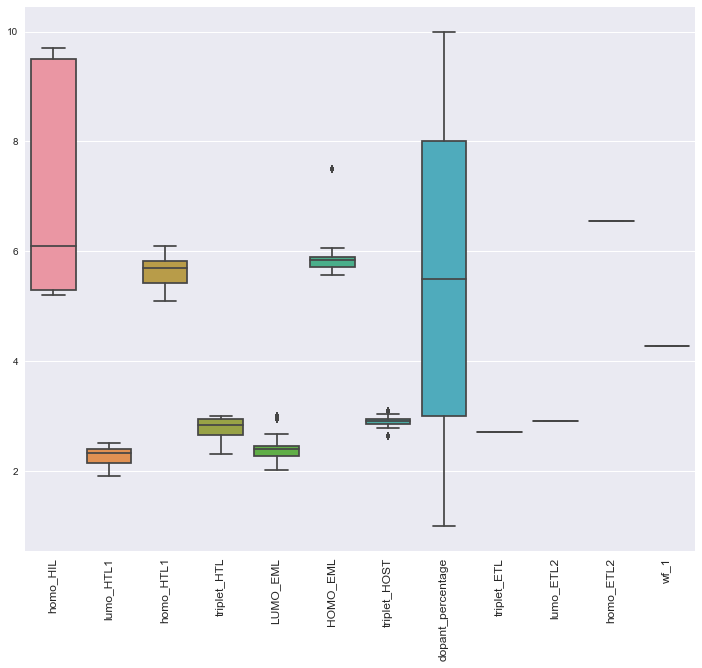

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(data=data)
plt.xticks(rotation=90,fontsize=12);

In [20]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

new_y = new_df['cd/A']

r2 = r2_score(new_y, y_pred)
mse = mean_squared_error(new_y, y_pred)

print(r2, mse, np.sqrt(mse))

-3.27889023847 34.395431293 5.86476182747


In [14]:
print("Instance 0 prediction:", loaded_model.predict(new_X[0]))
print("Instance 1 prediction:", loaded_model.predict(new_X[1]))

Instance 0 prediction: [ 19.587]
Instance 1 prediction: [ 23.39179487]


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


### Tree interpreter
Using tree interpreter, instruction available on this blog post http://blog.datadive.net/random-forest-interpretation-with-scikit-learn/

In [16]:
from treeinterpreter import treeinterpreter as ti

prediction, bias, contributions = ti.predict(loaded_model, new_X[:2])
names = list(X)
for i in range(len(new_X[:2])):
    print("Instance", i)
    print("Bias (trainset mean)", bias[i])
    print("Feature contributions:")
    for c, feature in sorted(zip(contributions[i], 
                                 names), 
                             key=lambda x: -abs(x[0])):
        print(feature, round(c, 2))
    print("-"*20 )

Instance 0
Bias (trainset mean) 26.7501777778
Feature contributions:
thickness_EIL 18.21
triplet_ETL 2.32
homo_HIL 2.02
thickness_HTL1 0.75
thickness_ETL2 0.74
homo_dopant 0.72
triplet_HOST -0.67
LUMO_EML 0.67
lumo_HTL1 -0.36
total_ETL_thickness 0.28
homo_ETL1 -0.22
total_HTL_thickness 0.17
homo_HTL3 0.17
homo_HTL1 -0.14
thickness_EML 0.1
dopant_percentage 0.08
homo_ETL2 -0.04
homo_HTL2 -0.01
lumo_HTL3 -0.0
thickness_HIL 0.0
lumo_HTL2 0.0
thickness_HTL2 0.0
thickness_HTL3 0.0
triplet_HTL 0.0
HOMO_EML 0.0
lumo_dopant 0.0
triplet_dopant 0.0
lumo_ETL1 0.0
thickness_ETL1 0.0
lumo_ETL2 0.0
cathode_workfunction 0.0
--------------------
Instance 1
Bias (trainset mean) 26.7501777778
Feature contributions:
thickness_EIL 18.21
triplet_ETL 2.32
homo_HIL 2.02
thickness_HTL1 0.75
thickness_ETL2 0.74
homo_dopant 0.72
triplet_HOST -0.67
LUMO_EML 0.67
lumo_HTL1 -0.36
total_ETL_thickness 0.28
homo_ETL1 -0.22
total_HTL_thickness 0.17
homo_HTL3 0.17
homo_HTL1 -0.14
thickness_EML 0.1
dopant_percentage 0.0

In [26]:
import numpy as np

print(prediction)
print(bias + np.sum(contributions, axis=1))

[ 19.587       23.39179487  21.45        20.76333333  23.39179487
  26.42179487]
[ 19.587       23.39179487  21.45        20.76333333  23.39179487
  26.42179487]


In [27]:
# try using scikit decision path
loaded_model.decision_path(new_X)

(<6x1310 sparse matrix of type '<class 'numpy.int64'>'
 	with 461 stored elements in Compressed Sparse Row format>,
 array([   0,  121,  250,  387,  528,  663,  794,  921, 1058, 1191, 1310], dtype=int32))